<a href="https://colab.research.google.com/github/Odima-dev/Data-Science-and-Machine-Learning/blob/main/Naturallanguageprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Problem 1: Scratch implementation of BoW
import re
from collections import defaultdict

# Sample sentences
sentences = [
    "This movie is SOOOO funny!!!!",
    "What a movie!",
    "best movie ever!!!!! this movie"
]

# Preprocessing function
def preprocess(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text.split()

# Creating 1-gram BoW
def create_1gram_bow(sentences):
    vocab = set()
    for sentence in sentences:
        words = preprocess(sentence)
        vocab.update(words)
    vocab = sorted(vocab)

    bow = []
    for sentence in sentences:
        words = preprocess(sentence)
        word_counts = defaultdict(int)
        for word in words:
            word_counts[word] += 1
        bow.append([word_counts[word] for word in vocab])

    return vocab, bow

# 1-gram results
vocab_1gram, bow_1gram = create_1gram_bow(sentences)
print("1-gram Vocabulary:", vocab_1gram)
print("1-gram BoW:")
for i, vec in enumerate(bow_1gram):
    print(f"Sentence {i+1}: {vec}")

# Creating 2-gram BoW
def create_2gram_bow(sentences):
    vocab = set()
    for sentence in sentences:
        words = preprocess(sentence)
        for i in range(len(words)-1):
            vocab.add((words[i], words[i+1]))
    vocab = sorted(vocab)

    bow = []
    for sentence in sentences:
        words = preprocess(sentence)
        gram_counts = defaultdict(int)
        for i in range(len(words)-1):
            gram = (words[i], words[i+1])
            gram_counts[gram] += 1
        bow.append([gram_counts[gram] for gram in vocab])

    return vocab, bow

# 2-gram results
vocab_2gram, bow_2gram = create_2gram_bow(sentences)
print("\n2-gram Vocabulary:", vocab_2gram)
print("2-gram BoW:")
for i, vec in enumerate(bow_2gram):
    print(f"Sentence {i+1}: {vec}")

1-gram Vocabulary: ['a', 'best', 'ever', 'funny', 'is', 'movie', 'soooo', 'this', 'what']
1-gram BoW:
Sentence 1: [0, 0, 0, 1, 1, 1, 1, 1, 0]
Sentence 2: [1, 0, 0, 0, 0, 1, 0, 0, 1]
Sentence 3: [0, 1, 1, 0, 0, 2, 0, 1, 0]

2-gram Vocabulary: [('a', 'movie'), ('best', 'movie'), ('ever', 'this'), ('is', 'soooo'), ('movie', 'ever'), ('movie', 'is'), ('soooo', 'funny'), ('this', 'movie'), ('what', 'a')]
2-gram BoW:
Sentence 1: [0, 0, 0, 1, 0, 1, 1, 1, 0]
Sentence 2: [1, 0, 0, 0, 0, 0, 0, 0, 1]
Sentence 3: [0, 1, 1, 0, 1, 0, 0, 1, 0]


In [3]:
# Problem 2: TF-IDF calculation

# Downloading the IMDB dataset
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
#Unzipping
!tar zxf aclImdb_v1.tar.gz
# aclImdb/train/unsup removed as unlabeled
!rm -rf aclImdb/train/unsup
# Show IMDB dataset description
!cat aclImdb/README

from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# Downloading NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Loading the IMDB dataset
train_review = load_files("./aclImdb/train/", encoding="utf-8")
x_train, y_train = train_review.data, train_review.target

test_review = load_files("./aclImdb/test/", encoding="utf-8")
x_test, y_test = test_review.data, test_review.target

# Initializing vectorizer with English stop words and max_features=5000
vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'),
                            max_features=5000,
                            token_pattern=r'(?u)\b\w+\b',
                            norm=None)

# Fitting and transforming the training data
x_train_tfidf = vectorizer.fit_transform(x_train)

# Transforming the test data
x_test_tfidf = vectorizer.transform(x_test)

print("Vocabulary size:", len(vectorizer.vocabulary_))
print("First sample vector shape:", x_train_tfidf[0].shape)
print("First sample non-zero values:", x_train_tfidf[0].nnz)

--2025-07-11 15:49:32--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz.1’

aclImdb_v1.tar.gz.1 100%[===================>]  80.23M  16.7MB/s    in 8.0s    

2025-07-11 15:49:40 (10.0 MB/s) - ‘aclImdb_v1.tar.gz.1’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocabulary size: 5000
First sample vector shape: (1, 5000)
First sample non-zero values: 51


In [4]:
# Problem 3: Learning with TF-IDF
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Training a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train_tfidf, y_train)

# Predicting on test data
y_pred = model.predict(x_test_tfidf)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test accuracy:", accuracy)

Test accuracy: 0.81568


In [6]:
# Problem 4: Scratch mounting of TF-IDF
import math

# Sample sentences
sentences = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

# Preprocessing sentences
def preprocess_for_tfidf(text):
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text.split()

processed_sentences = [preprocess_for_tfidf(sent) for sent in sentences]

def calculate_tfidf_scratch(sentences, use_sklearn_formula=False):
    """
    Calculate TF-IDF from scratch with both standard and sklearn formulas
    """
    # Building vocabulary
    vocab = set()
    for words in sentences:
        vocab.update(words)
    vocab = sorted(list(vocab))

    N = len(sentences)  # Number of documents

    # Calculating document frequency for each term
    df = {}
    for term in vocab:
        df[term] = sum(1 for words in sentences if term in words)

    # Calculating TF-IDF matrix
    tfidf_matrix = []

    for doc_words in sentences:
        doc_tfidf = {}
        doc_length = len(doc_words)

        for term in vocab:
            # Calculating term frequency
            tf = doc_words.count(term)

            if use_sklearn_formula:
                # Sklearn formula
                tf_score = tf  # No normalization
                idf_score = math.log((1 + N) / (1 + df[term])) + 1
            else:
                # Standard formula
                tf_score = tf / doc_length if doc_length > 0 else 0
                idf_score = math.log(N / df[term]) if df[term] > 0 else 0

            tfidf_score = tf_score * idf_score
            doc_tfidf[term] = tfidf_score

        tfidf_matrix.append(doc_tfidf)

    return tfidf_matrix, vocab

# Calculating both versions
tfidf_standard, vocab = calculate_tfidf_scratch(processed_sentences, use_sklearn_formula=False)
tfidf_sklearn, _ = calculate_tfidf_scratch(processed_sentences, use_sklearn_formula=True)

print("Standard TF-IDF:")
for i, doc in enumerate(tfidf_standard):
    print(f"Document {i+1}:")
    for term, score in doc.items():
        if score > 0:
            print(f"  {term}: {score:.4f}")

print("\nScikit-learn TF-IDF:")
for i, doc in enumerate(tfidf_sklearn):
    print(f"Document {i+1}:")
    for term, score in doc.items():
        if score > 0:
            print(f"  {term}: {score:.4f}")

Standard TF-IDF:
Document 1:
  funny: 0.2197
  is: 0.2197
  soooo: 0.2197
  this: 0.0811
Document 2:
  a: 0.2197
  i: 0.2197
  never: 0.2197
  what: 0.2197
Document 3:
  best: 0.2197
  ever: 0.2197
  this: 0.0811

Scikit-learn TF-IDF:
Document 1:
  funny: 1.6931
  is: 1.6931
  movie: 1.0000
  soooo: 1.6931
  this: 1.2877
Document 2:
  a: 1.6931
  i: 1.6931
  movie: 1.0000
  never: 1.6931
  what: 1.6931
Document 3:
  best: 1.6931
  ever: 1.6931
  movie: 2.0000
  this: 1.2877


In [7]:
# Problem 5: Pre-processing of corpus
import re
import numpy as np

def preprocess_corpus_complete(text):
    """
    Complete preprocessing: remove URLs, special characters, convert to lowercase
    """
    # Converting bytes to string if needed
    if isinstance(text, bytes):
        text = text.decode('utf-8')

    # Removing URLs (http, https, www)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Removing HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Removing special characters, keep only letters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Converting to lowercase
    text = text.lower()

    # Removing extra whitespace and splitting into words
    words = text.split()

    # Removing empty strings
    words = [word for word in words if word]

    return words

# Test preprocessing on first few samples
print("Original first review (first 200 chars):")
sample_text = x_train[0][:200] if isinstance(x_train[0], str) else x_train[0].decode('utf-8')[:200]
print(sample_text)

print("\nProcessed first review (first 20 words):")
processed_sample = preprocess_corpus_complete(x_train[0])
print(processed_sample[:20])

# Preprocessing entire corpus
processed_corpus = []
for i, text in enumerate(x_train):
    processed_words = preprocess_corpus_complete(text)
    processed_corpus.append(processed_words)

    if i % 5000 == 0:
        print(f"Processed {i} documents...")

print(f"Total documents processed: {len(processed_corpus)}")
print(f"Average words per document: {np.mean([len(doc) for doc in processed_corpus]):.2f}")


Original first review (first 200 chars):
Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of be

Processed first review (first 20 words):
['zero', 'day', 'leads', 'you', 'to', 'think', 'even', 'rethink', 'why', 'two', 'boysyoung', 'men', 'would', 'do', 'what', 'they', 'did', 'commit', 'mutual', 'suicide']
Processed 0 documents...
Processed 5000 documents...
Processed 10000 documents...
Processed 15000 documents...
Processed 20000 documents...
Total documents processed: 25000
Average words per document: 227.75


In [8]:
# Problem 6: Learning Word2Vec

!pip install gensim
from gensim.models import Word2Vec

# Training Word2Vec model with corrected parameters
print("Training Word2Vec model...")
word2vec_model = Word2Vec(
    sentences=processed_corpus,
    vector_size=10,
    window=5,
    min_count=5,
    workers=4,
    sg=1,
    epochs=10,
    seed=42
)

print(f"Word2Vec model trained successfully!")
print(f"Vocabulary size: {len(word2vec_model.wv.key_to_index)}")
print(f"Vector dimensions: {word2vec_model.wv.vector_size}")

# Showing sample vocabulary
sample_words = list(word2vec_model.wv.key_to_index.keys())[:10]
print(f"Sample vocabulary: {sample_words}")

# Showing word vectors
print("\nSample word vectors:")
for word in sample_words[:5]:
    print(f"{word}: {word2vec_model.wv[word]}")

# Saving the model
word2vec_model.save("word2vec_imdb_corrected.model")
print("Model saved as 'word2vec_imdb_corrected.model'")

Training Word2Vec model...
Word2Vec model trained successfully!
Vocabulary size: 30736
Vector dimensions: 10
Sample vocabulary: ['the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'this', 'i']

Sample word vectors:
the: [ 0.37799156 -0.21049342 -0.22984938  0.30057365  0.5762314   0.26286152
 -0.7053358  -0.58138794  0.19089581 -0.2564669 ]
and: [ 0.29346564 -0.19591168 -0.15183873  0.18609188  0.584112   -0.13193974
 -0.74369824 -0.5764052  -0.06742604 -0.16386428]
a: [ 0.17048627  0.28573304 -0.20704769  0.11377165  0.56010115 -0.09859034
 -0.7745353  -0.68258005  0.34284788 -0.14353824]
of: [ 0.11918096 -0.35146362 -0.4343986   0.3727974   0.4879332   0.4076925
 -0.8006297  -0.6606315   0.23431708 -0.25685182]
to: [-0.09813032 -0.05465105 -0.07111063  0.1987165   1.0169905  -0.01903378
 -0.96834236 -0.12245633  0.21361001  0.39697173]
Model saved as 'word2vec_imdb_corrected.model'


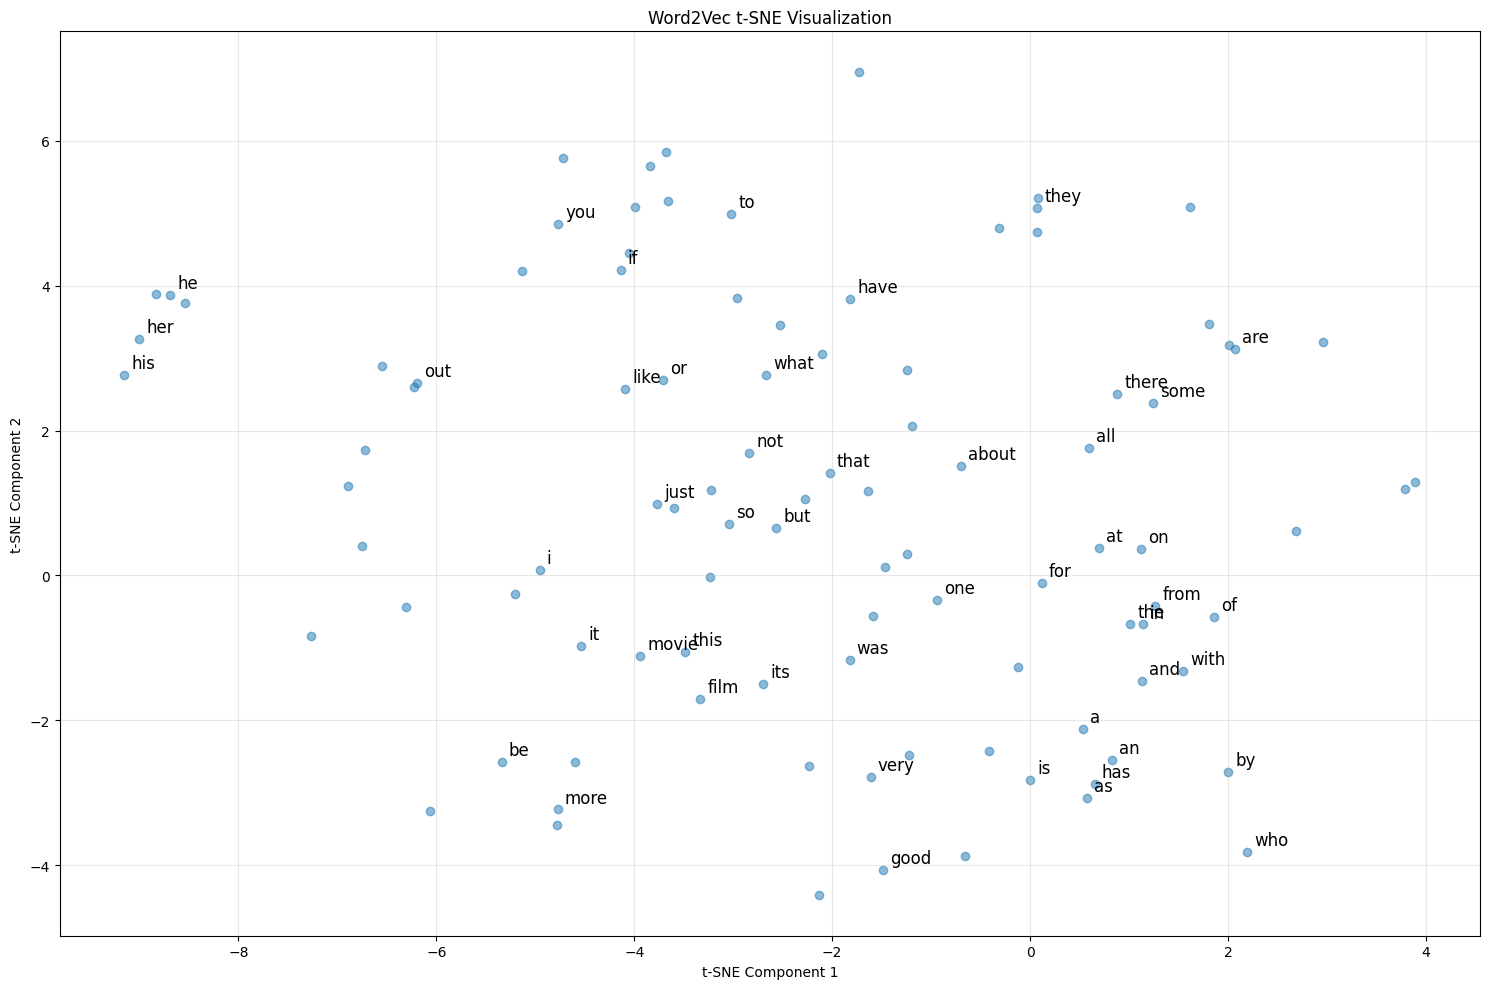

Words similar to 'good': [('decent', 0.9835262298583984), ('badits', 0.9561959505081177), ('bad', 0.9552809596061707), ('terriblethe', 0.9544026851654053), ('morethe', 0.9499185085296631)]
Words similar to 'bad': [('badbut', 0.9674617052078247), ('ok', 0.9643531441688538), ('sucks', 0.9614413380622864), ('badits', 0.9611881375312805), ('horrible', 0.9610113501548767)]
Words similar to 'movie': [('filmbut', 0.985980212688446), ('moviebut', 0.9832556247711182), ('this', 0.9763143062591553), ('methis', 0.9722680449485779), ('itits', 0.971467912197113)]
Words similar to 'actor': [('ebenezer', 0.9882241487503052), ('falks', 0.9735031127929688), ('comedienne', 0.9701220393180847), ('daltons', 0.9668581485748291), ('townsend', 0.9662558436393738)]


In [22]:
# Problem 7: (Advance assignment) Vector Visualization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# Getting vocabulary and vectors
words_to_plot = list(word2vec_model.wv.key_to_index.keys())[:100]
word_vectors = [word2vec_model.wv[word] for word in words_to_plot]

# Converting to NumPy array
word_vectors = np.array(word_vectors)

# Reducing dimensions with t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
vectors_tsne = tsne.fit_transform(word_vectors)

# Plotting
plt.figure(figsize=(15, 10))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], alpha=0.5)

# Annotating some words
for i, word in enumerate(words_to_plot[:50]):  # Plotting first 50 words
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]),
                 xytext=(5, 5), textcoords='offset points', fontsize=12)

plt.title("Word2Vec t-SNE Visualization")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Finding similar words
test_words = ['good', 'bad', 'movie', 'actor']
for word in test_words:
    if word in word2vec_model.wv.key_to_index:
        similar = word2vec_model.wv.most_similar(word, topn=5)
        print(f"Words similar to '{word}': {similar}")
    else:
        print(f"'{word}' not in vocabulary")

In [26]:
# Issue 8: (Advance assignment) Classification of movie reviews using Word2Vec
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Function to get document vector by averaging word vectors
def get_document_vector(words, model):
    """
    Get document vector by averaging word vectors
    """
    vectors = []
    for word in words:
        if word in model.wv.key_to_index:
            vectors.append(model.wv[word])

    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.wv.vector_size)

# Creating document vectors for training data
print("Creating document vectors for training data...")
x_train_vectors = []
for i, doc in enumerate(processed_corpus):
    vec = get_document_vector(doc, word2vec_model)
    x_train_vectors.append(vec)

    if i % 5000 == 0:
        print(f"Processed {i} training documents...")

x_train_vectors = np.array(x_train_vectors)

# Preprocessing  and createing vectors for test data
print("Creating document vectors for test data...")
x_test_vectors = []
for i, text in enumerate(x_test):
    processed_words = preprocess_corpus_complete(text)
    vec = get_document_vector(processed_words, word2vec_model)
    x_test_vectors.append(vec)

    if i % 5000 == 0:
        print(f"Processed {i} test documents...")

x_test_vectors = np.array(x_test_vectors)

print(f"Training vectors shape: {x_train_vectors.shape}")
print(f"Test vectors shape: {x_test_vectors.shape}")

# Training  classifier
print("Training classifier...")
classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(x_train_vectors, y_train)

# Making  predictions
y_pred = classifier.predict(x_test_vectors)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Word2Vec classification accuracy: {accuracy:.4f}")

Creating document vectors for training data...
Processed 0 training documents...
Processed 5000 training documents...
Processed 10000 training documents...
Processed 15000 training documents...
Processed 20000 training documents...
Creating document vectors for test data...
Processed 0 test documents...
Processed 5000 test documents...
Processed 10000 test documents...
Processed 15000 test documents...
Processed 20000 test documents...
Training vectors shape: (25000, 10)
Test vectors shape: (25000, 10)
Training classifier...
Word2Vec classification accuracy: 0.7070
